In [2]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00


Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1580.4±612.5 MB/s, size: 44.2 KB)
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 203.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.7it/s 2.9s
                   all        128        929      0.788      0.668       0.76      0.588
                person         61        254      0.912      0.685      0.828      0.624
               bicycle          3          6          1      0.326      0.451      0.267
                   car         12         46      0.861      0.217        0.4       0.23
            motorcycle          4          5      0.797      0.787      0.928       0.78
              airplane          5

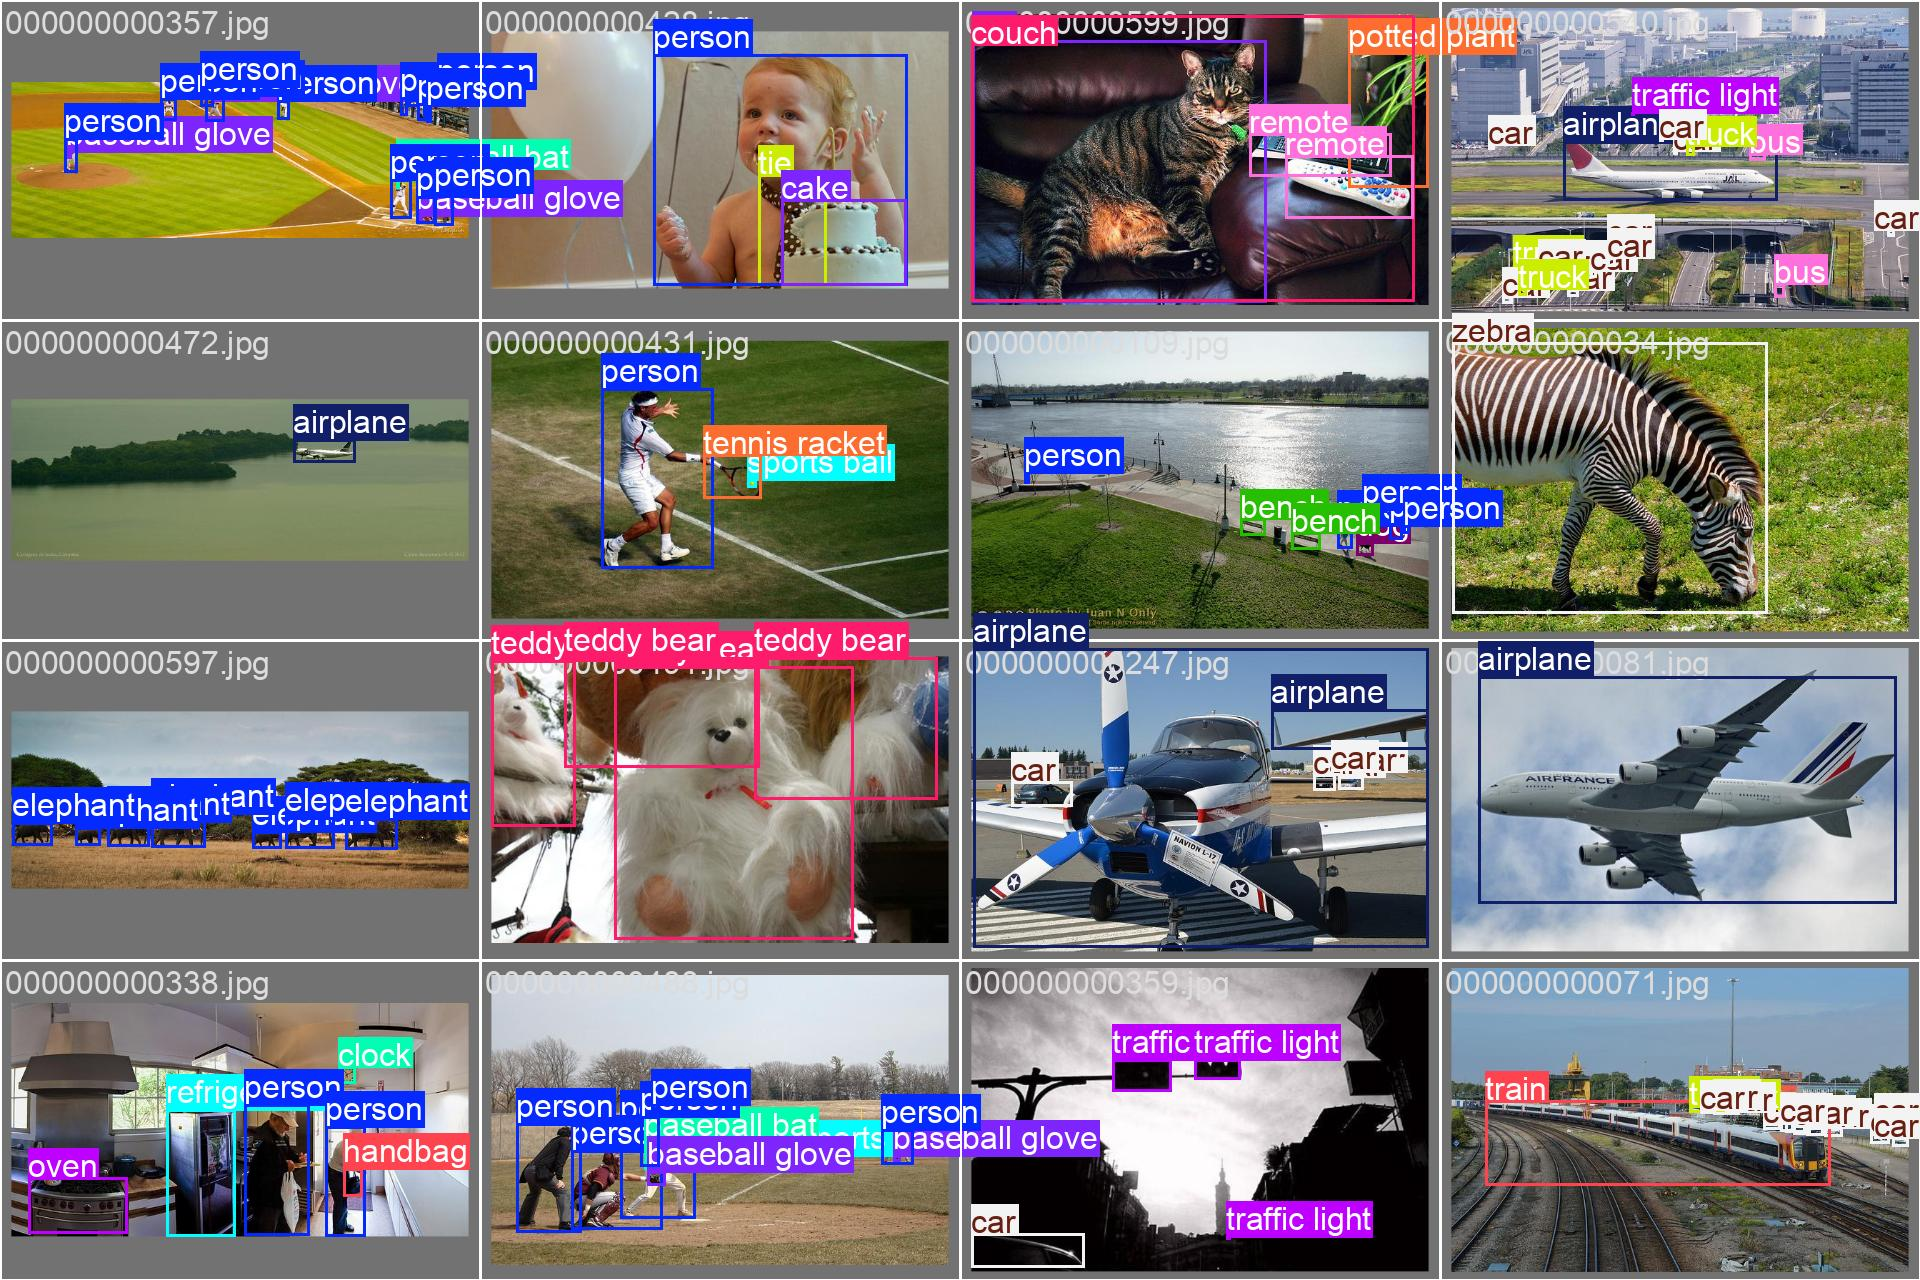

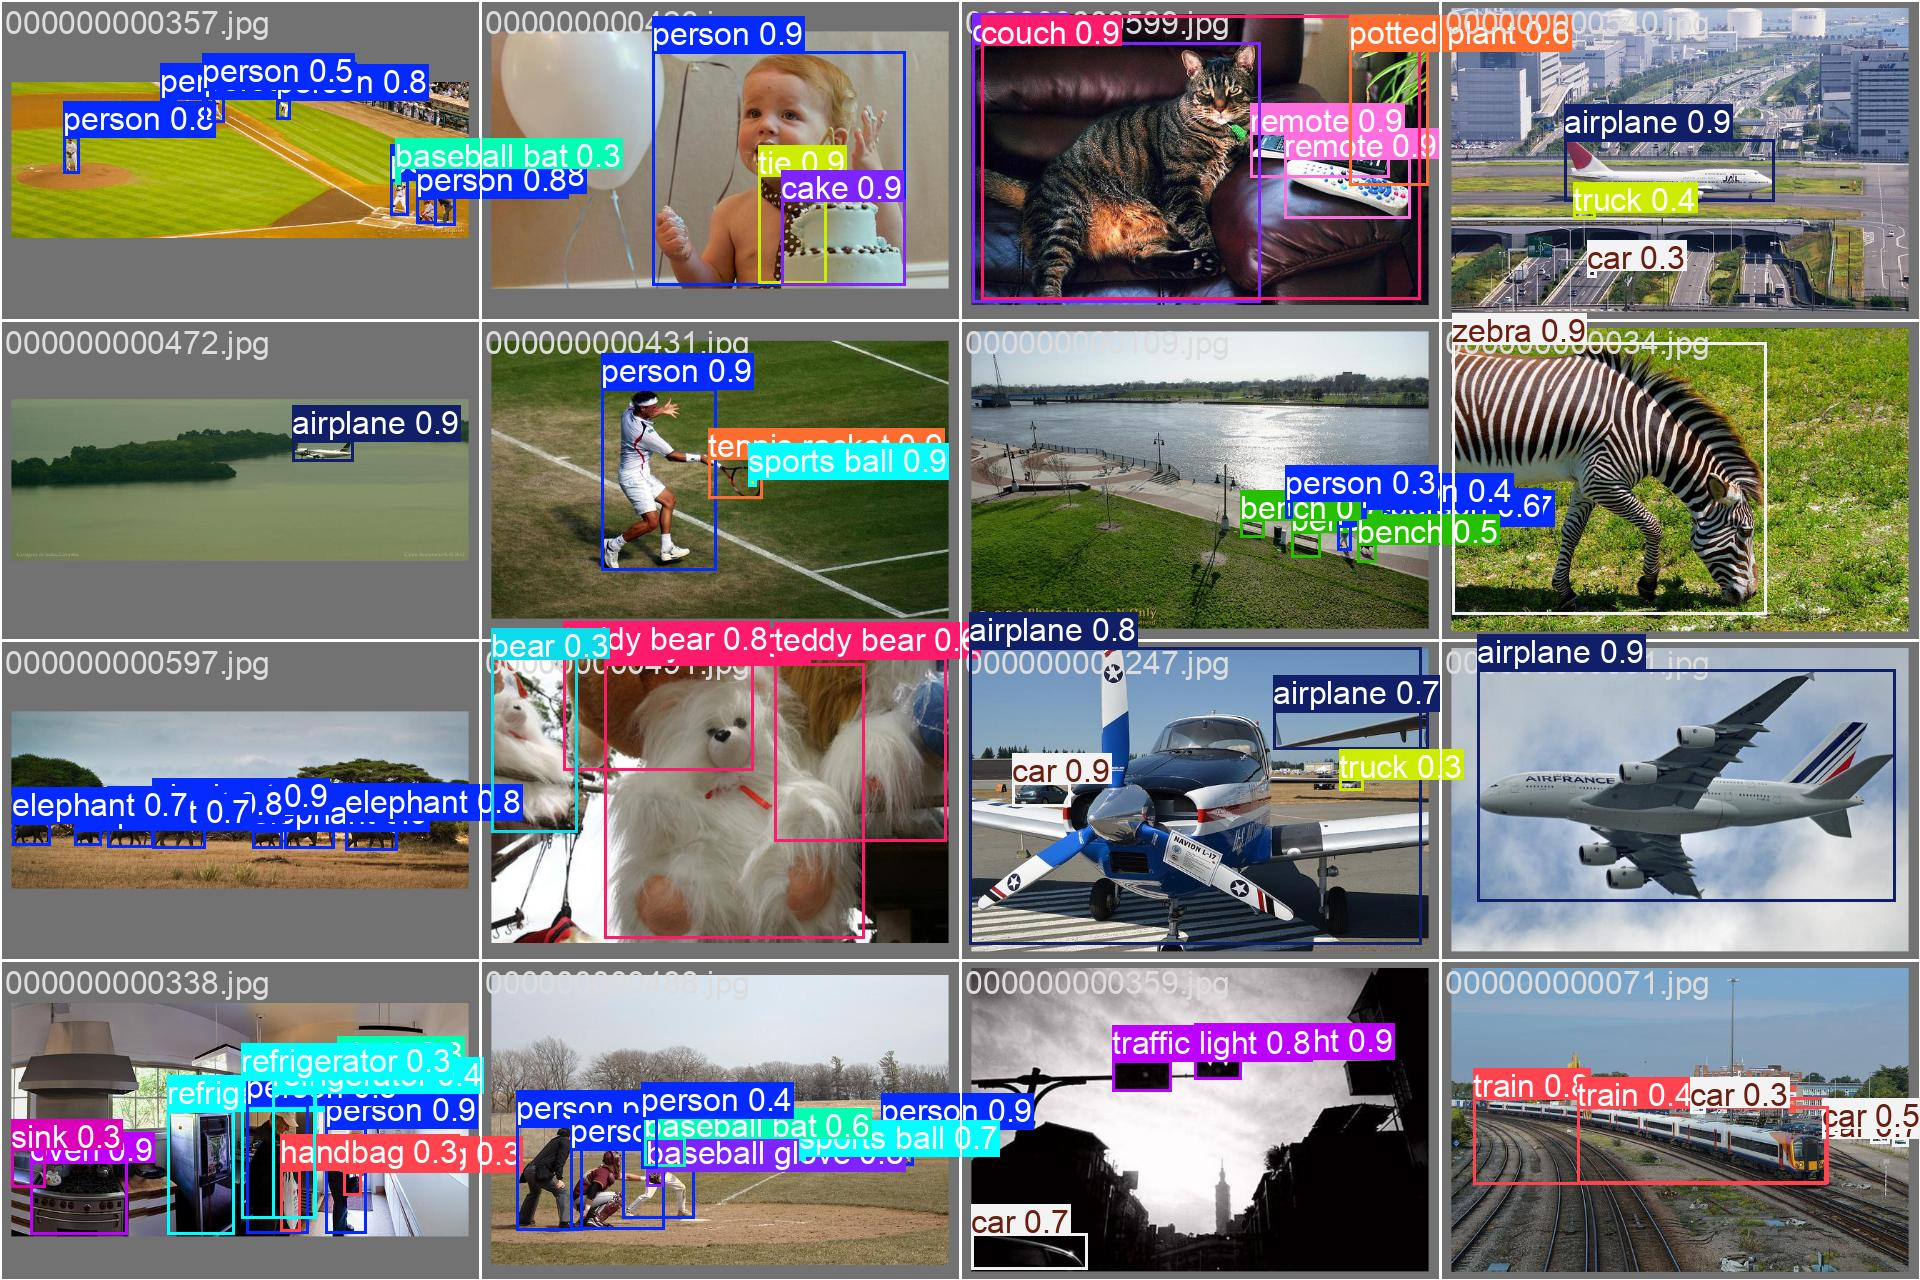

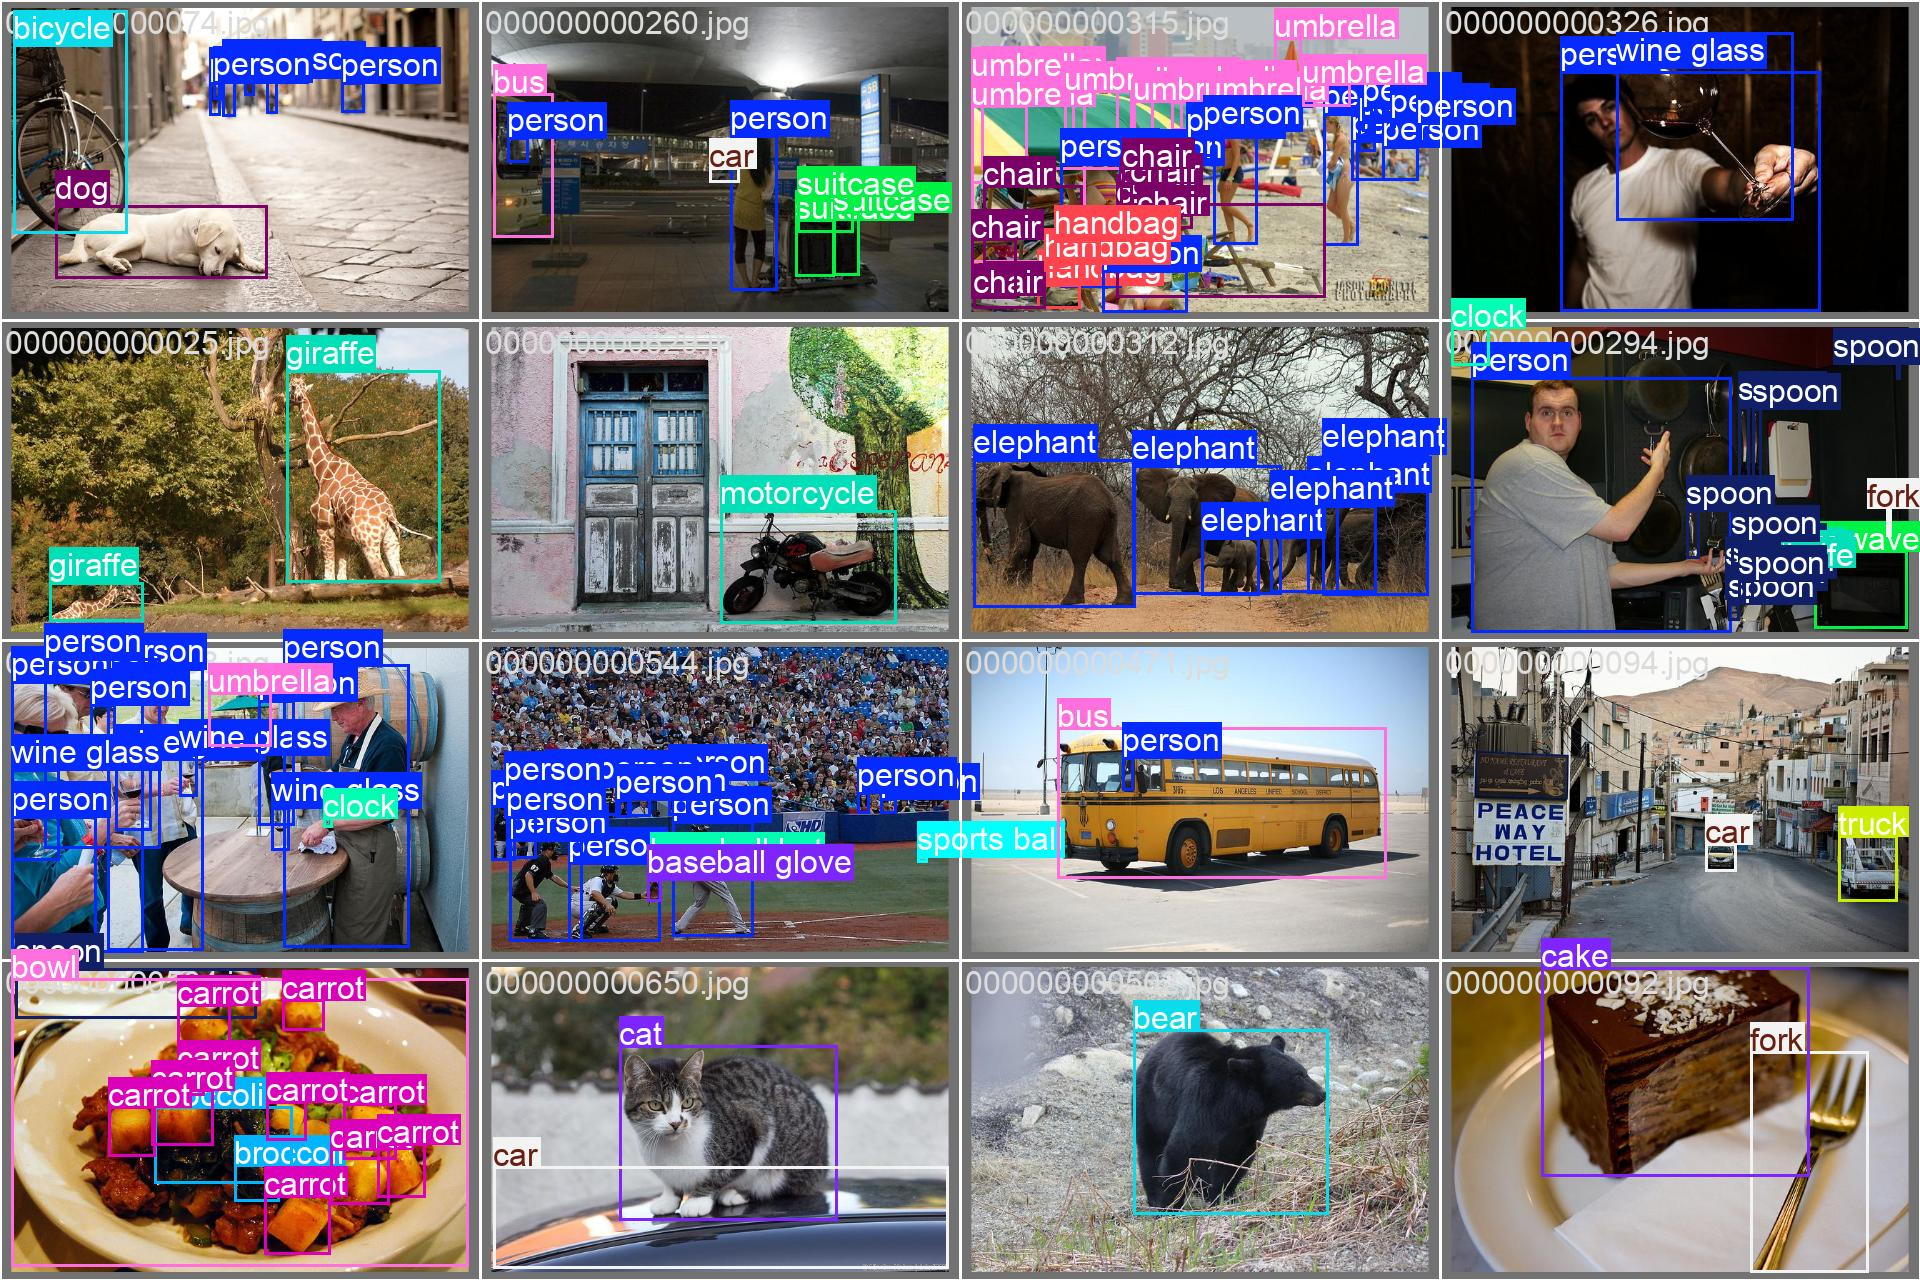

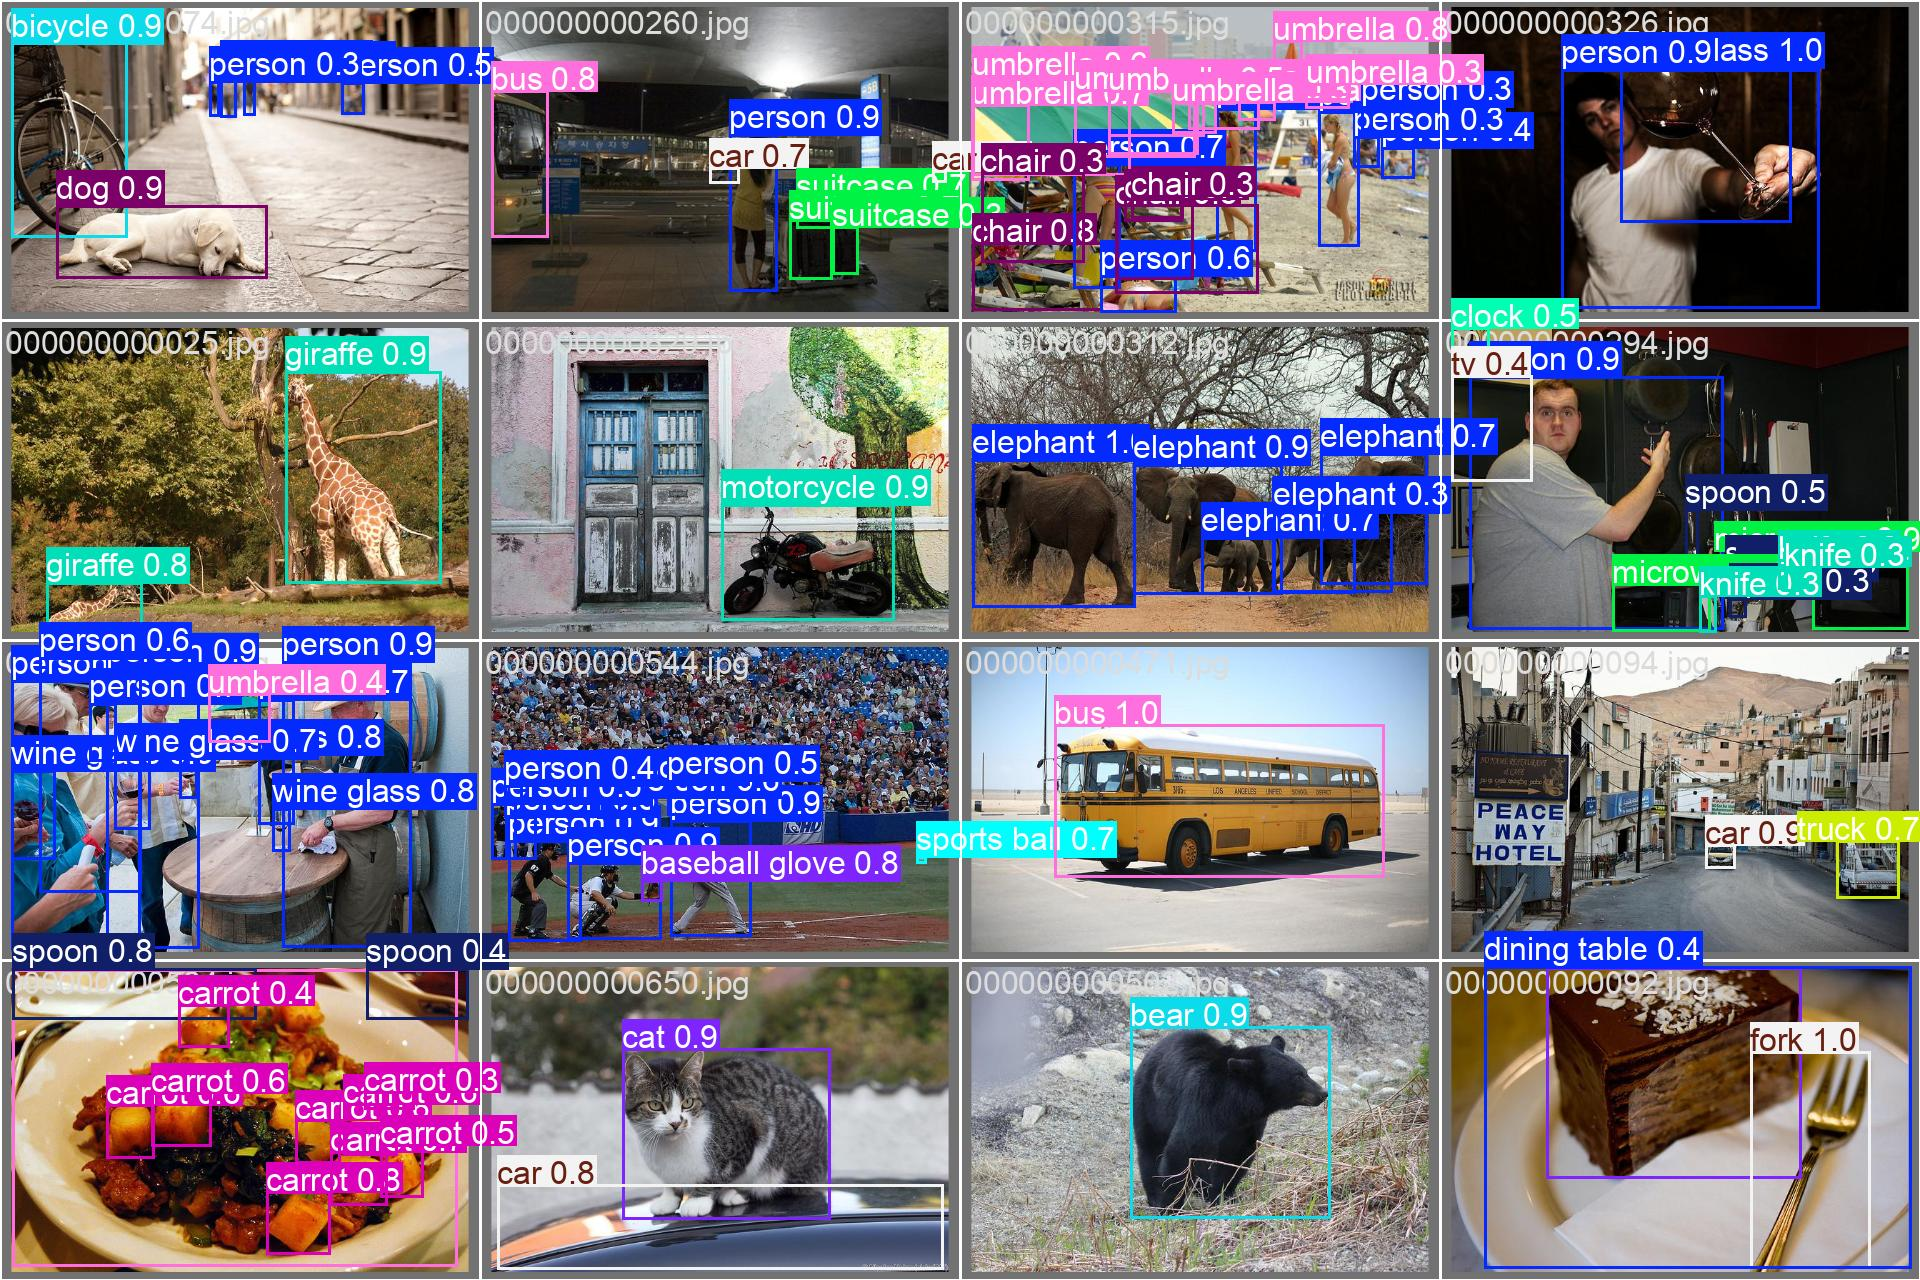

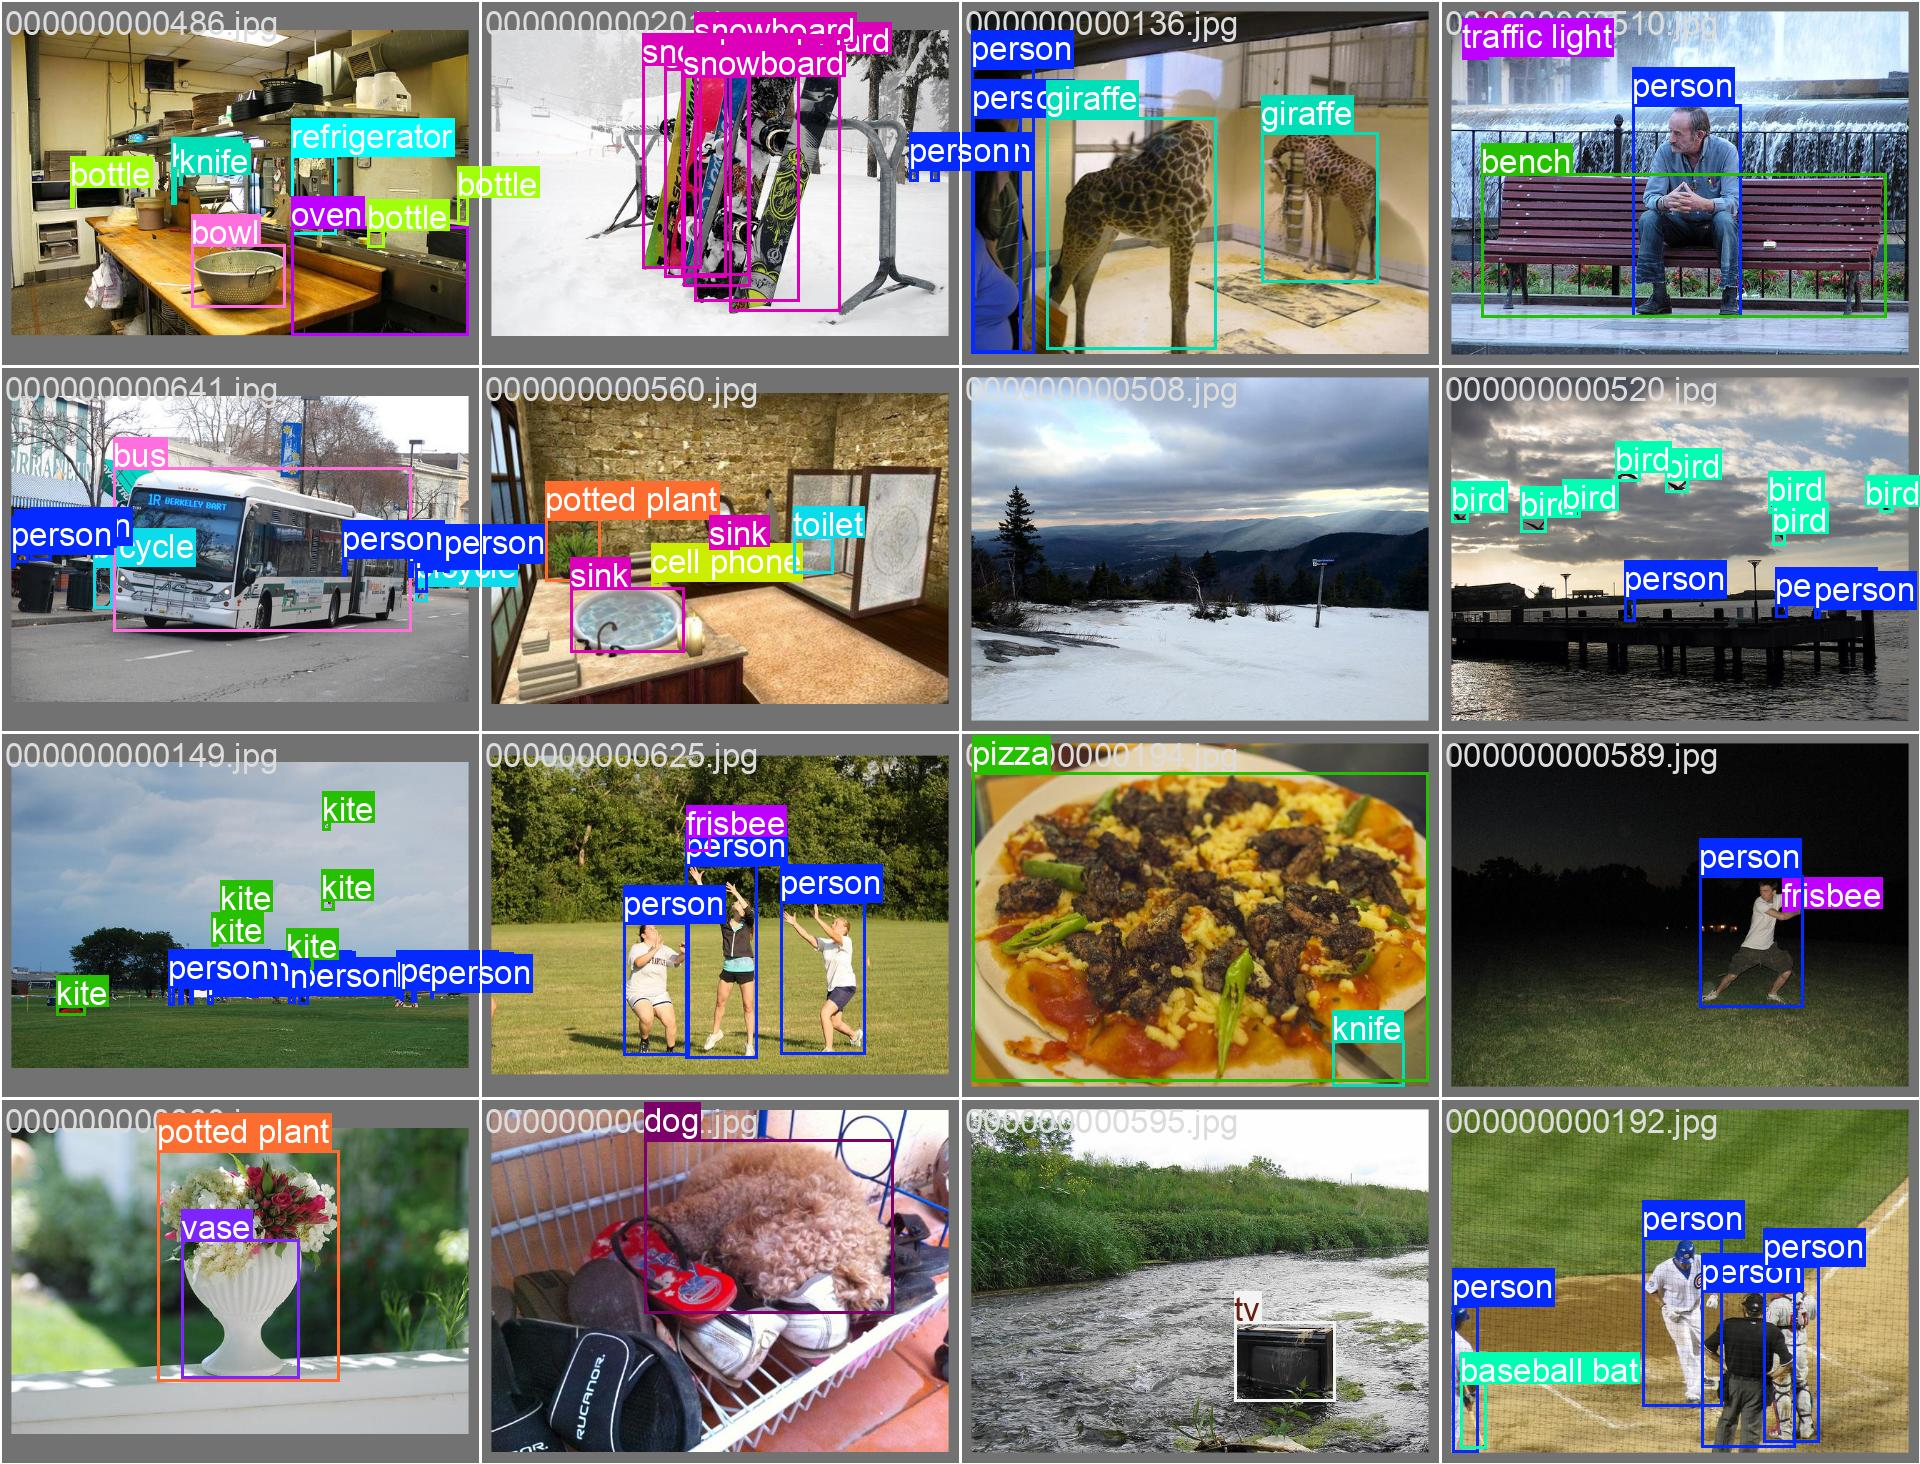

In [4]:
from ultralytics import YOLO
import glob
from IPython.display import Image, display


model = YOLO("yolov8s.pt")


metrics = model.val(data="coco128.yaml", split="val", imgsz=640)


results = sorted(glob.glob("runs/detect/val*/**/*.jpg", recursive=True))
for img_path in results[:5]:
    display(Image(filename=img_path))


In [8]:
print("Model Evaluation Metrics:")
print(f"mAP@0.5: {metrics.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.3f}")
print(f"Precision: {metrics.box.mp:.3f}")
print(f"Recall: {metrics.box.mr:.3f}")
print(f"mAP per class: {metrics.box.maps}")


Model Evaluation Metrics:
mAP@0.5: 0.760
mAP@0.5:0.95: 0.588
Precision: 0.788
Recall: 0.668
mAP per class: [    0.62376     0.26715     0.23007     0.78046     0.83625     0.72082     0.85175     0.32401     0.48099     0.22858     0.58835     0.82234     0.58835     0.32953     0.69391     0.92948     0.74171       0.797     0.58835     0.58835     0.77845      0.8955      0.9713     0.76441      0.4833     0.62506
     0.27139     0.62749     0.69657     0.67729      0.6965     0.62223     0.45951     0.26075     0.25363     0.25537     0.42153     0.58835     0.34062     0.36102     0.54478     0.51392     0.24467     0.57737     0.49741     0.68414       0.995     0.58835     0.94562     0.63923     0.27605     0.53081
       0.995     0.84302     0.88788     0.85542     0.30519     0.78474      0.6226      0.4258     0.56291      0.8955     0.84602     0.76006     0.07033     0.54276     0.58835     0.31695     0.86458      0.3012     0.58835     0.30789     0.81018      0.2514   

In [9]:
print(f"Mean IoU (approx): {metrics.box.map:.3f}")


Mean IoU (approx): 0.588


In [10]:
report = f"""
📘 MODEL EVALUATION REPORT
==========================
Model: YOLOv8s
Dataset: COCO128 (Validation Split)

Metrics Summary:
----------------
mAP@0.5       : {metrics.box.map50:.3f}
mAP@0.5:0.95  : {metrics.box.map:.3f}
Precision     : {metrics.box.mp:.3f}
Recall        : {metrics.box.mr:.3f}

Interpretation:
---------------
- mAP@0.5 measures how well detections overlap with ground truth at IoU 0.5.
- mAP@0.5:0.95 gives a stricter average over multiple IoU thresholds.
- Precision shows how many predicted boxes are correct.
- Recall shows how many real objects are correctly detected.

Date: Evaluation completed successfully ✅
"""


with open("model_evaluation_report.txt", "w") as f:
    f.write(report)

print(report)



📘 MODEL EVALUATION REPORT
Model: YOLOv8s
Dataset: COCO128 (Validation Split)

Metrics Summary:
----------------
mAP@0.5       : 0.760
mAP@0.5:0.95  : 0.588
Precision     : 0.788
Recall        : 0.668

Interpretation:
---------------
- mAP@0.5 measures how well detections overlap with ground truth at IoU 0.5.
- mAP@0.5:0.95 gives a stricter average over multiple IoU thresholds.
- Precision shows how many predicted boxes are correct.
- Recall shows how many real objects are correctly detected.

Date: Evaluation completed successfully ✅



Taling Input

In [ ]:
from ultralytics import YOLO
import streamlit as st
from PIL import Image
import numpy as np

model = YOLO("best.pt")

st.title("Object Detection App")

uploaded = st.file_uploader("Upload an Image:", type=["jpg", "png", "jpeg"])

if uploaded:
    img = Image.open(uploaded)
    results = model(img)
    result_img = results[0].plot()
    st.image(result_img, caption="Detection Result")
